# Explore here

In [63]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir la ruta del archivo relativa al directorio de trabajo actual
file_path = '../data/raw/bank-marketing-campaign-data.csv'

# Cargar el archivo CSV
df = pd.read_csv(file_path,sep=';')

# Mostrar shape del DataFrame
df.shape

(41188, 21)

Vamos a proceder a hacer un analisis previo con info y describe:

In [64]:
# Obtener el resumen estadístico como un DataFrame
describe_df = df.describe()

# Mostrar todas las columnas del resumen estadístico
print(describe_df.to_string())


               age      duration      campaign         pdays      previous  emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000
mean      40.02406    258.285010      2.567593    962.475454      0.172963      0.081886       93.575664     -40.502600      3.621291   5167.035911
std       10.42125    259.279249      2.770014    186.910907      0.494901      1.570960        0.578840       4.628198      1.734447     72.251528
min       17.00000      0.000000      1.000000      0.000000      0.000000     -3.400000       92.201000     -50.800000      0.634000   4963.600000
25%       32.00000    102.000000      1.000000    999.000000      0.000000     -1.800000       93.075000     -42.700000      1.344000   5099.100000
50%       38.00000    180.000000      2.000000    999.000000      0.000000      1.100000       93.749000     -41

In [65]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Divido en train y test

In [66]:
from sklearn.model_selection import train_test_split

# Dividir el DataFrame en conjuntos de entrenamiento (train) y prueba (test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Imprimir la forma de los conjuntos para verificar la división
print(f"Tamaño del conjunto de entrenamiento: {train_df.shape}")
print(f"Tamaño del conjunto de prueba: {test_df.shape}")
df.shape

Tamaño del conjunto de entrenamiento: (32950, 21)
Tamaño del conjunto de prueba: (8238, 21)


(41188, 21)

Eliminamos duplicados

In [67]:
# Verificar las dimensiones del DataFrame original
print("Dimensiones originales del DataFrame:", df.shape)

# Identificar duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"Número de filas duplicadas: {num_duplicados}")

# Mostrar algunas filas duplicadas (si existen)
if num_duplicados > 0:
    print("Ejemplo de filas duplicadas:")
    print(df[duplicados].head())

# Eliminar duplicados
df_sin_duplicados = df.drop_duplicates()

# Verificar las dimensiones del DataFrame después de eliminar duplicados
print("Dimensiones del DataFrame después de eliminar duplicados:", df_sin_duplicados.shape)

Dimensiones originales del DataFrame: (41188, 21)
Número de filas duplicadas: 12
Ejemplo de filas duplicadas:
       age          job   marital            education default housing loan  \
1266    39  blue-collar   married             basic.6y      no      no   no   
12261   36      retired   married              unknown      no      no   no   
14234   27   technician    single  professional.course      no      no   no   
16956   47   technician  divorced          high.school      no     yes   no   
18465   32   technician    single  professional.course      no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
1266   telephone   may         thu       124         1    999         0   
12261  telephone   jul         thu        88         1    999         0   
14234   cellular   jul         mon       331         2    999         0   
16956   cellular   jul         thu        43         3    999         0   
18465   cellular   jul         thu      

Graficamos categóricas

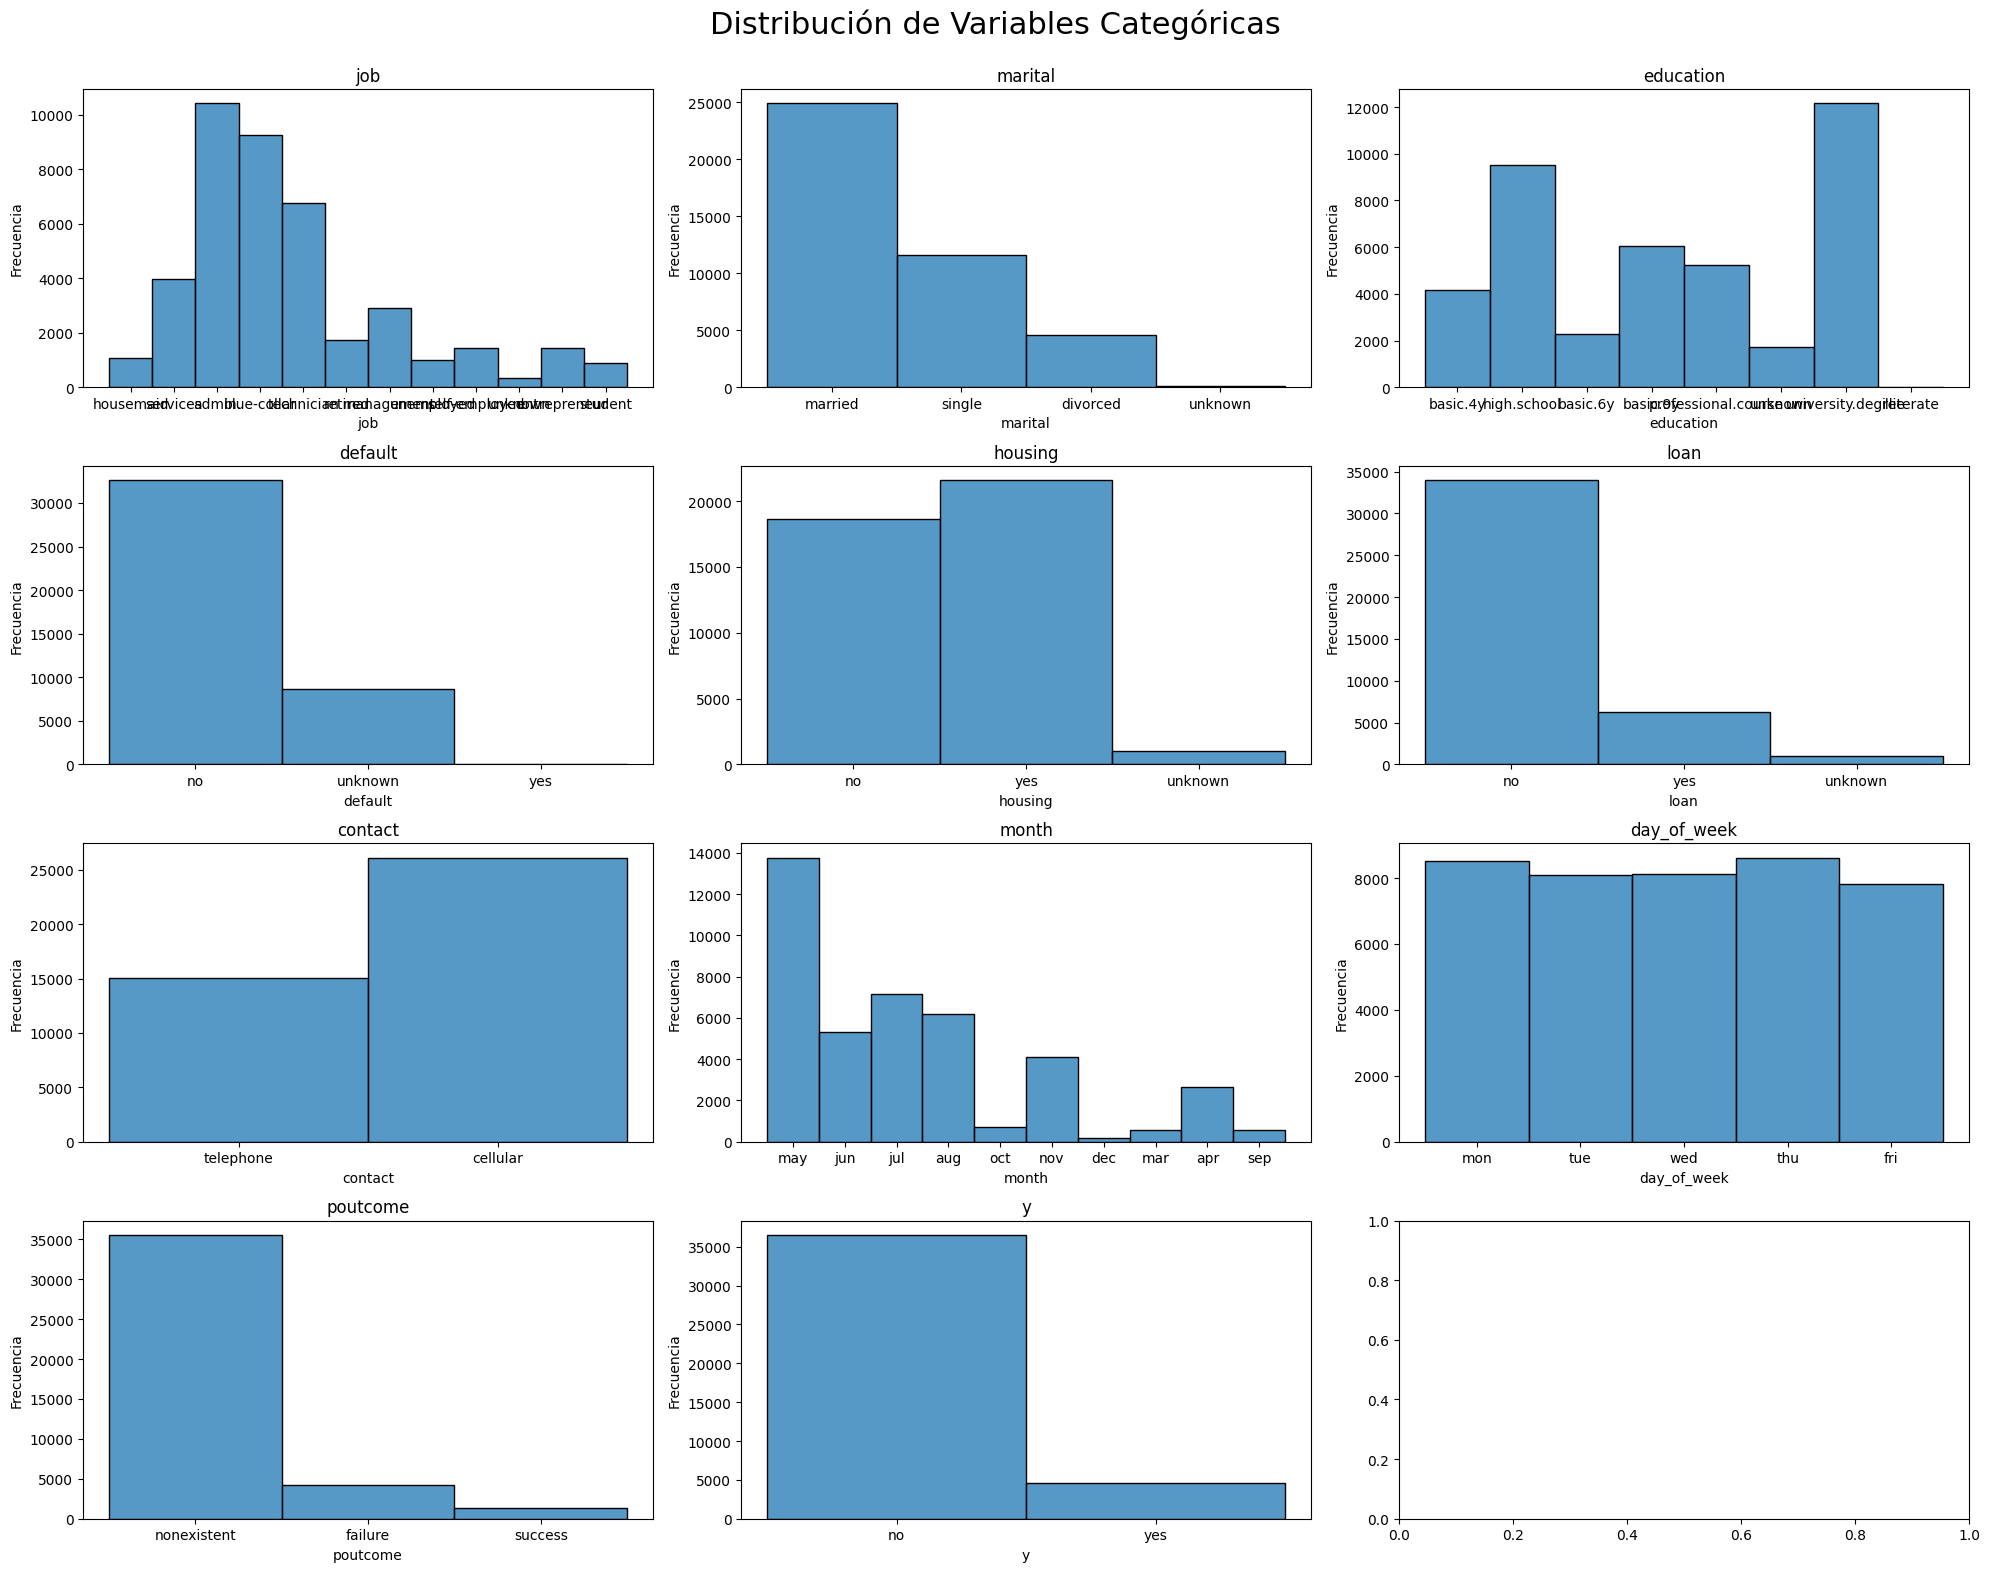

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Listar las columnas categóricas
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                       'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Definir el tamaño del subplot
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 16))  # Ajusta las filas y columnas según la cantidad de variables
fig.suptitle('Distribución de Variables Categóricas', fontsize=22)

# Crear un histograma para cada variable categórica
for idx, col in enumerate(categorical_columns):
    row = idx // 3  # Determinar la fila
    col_idx = idx % 3  # Determinar la columna
    sns.histplot(data=df, x=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)
    axes[row, col_idx].set_ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Espacio para el título general
plt.show()

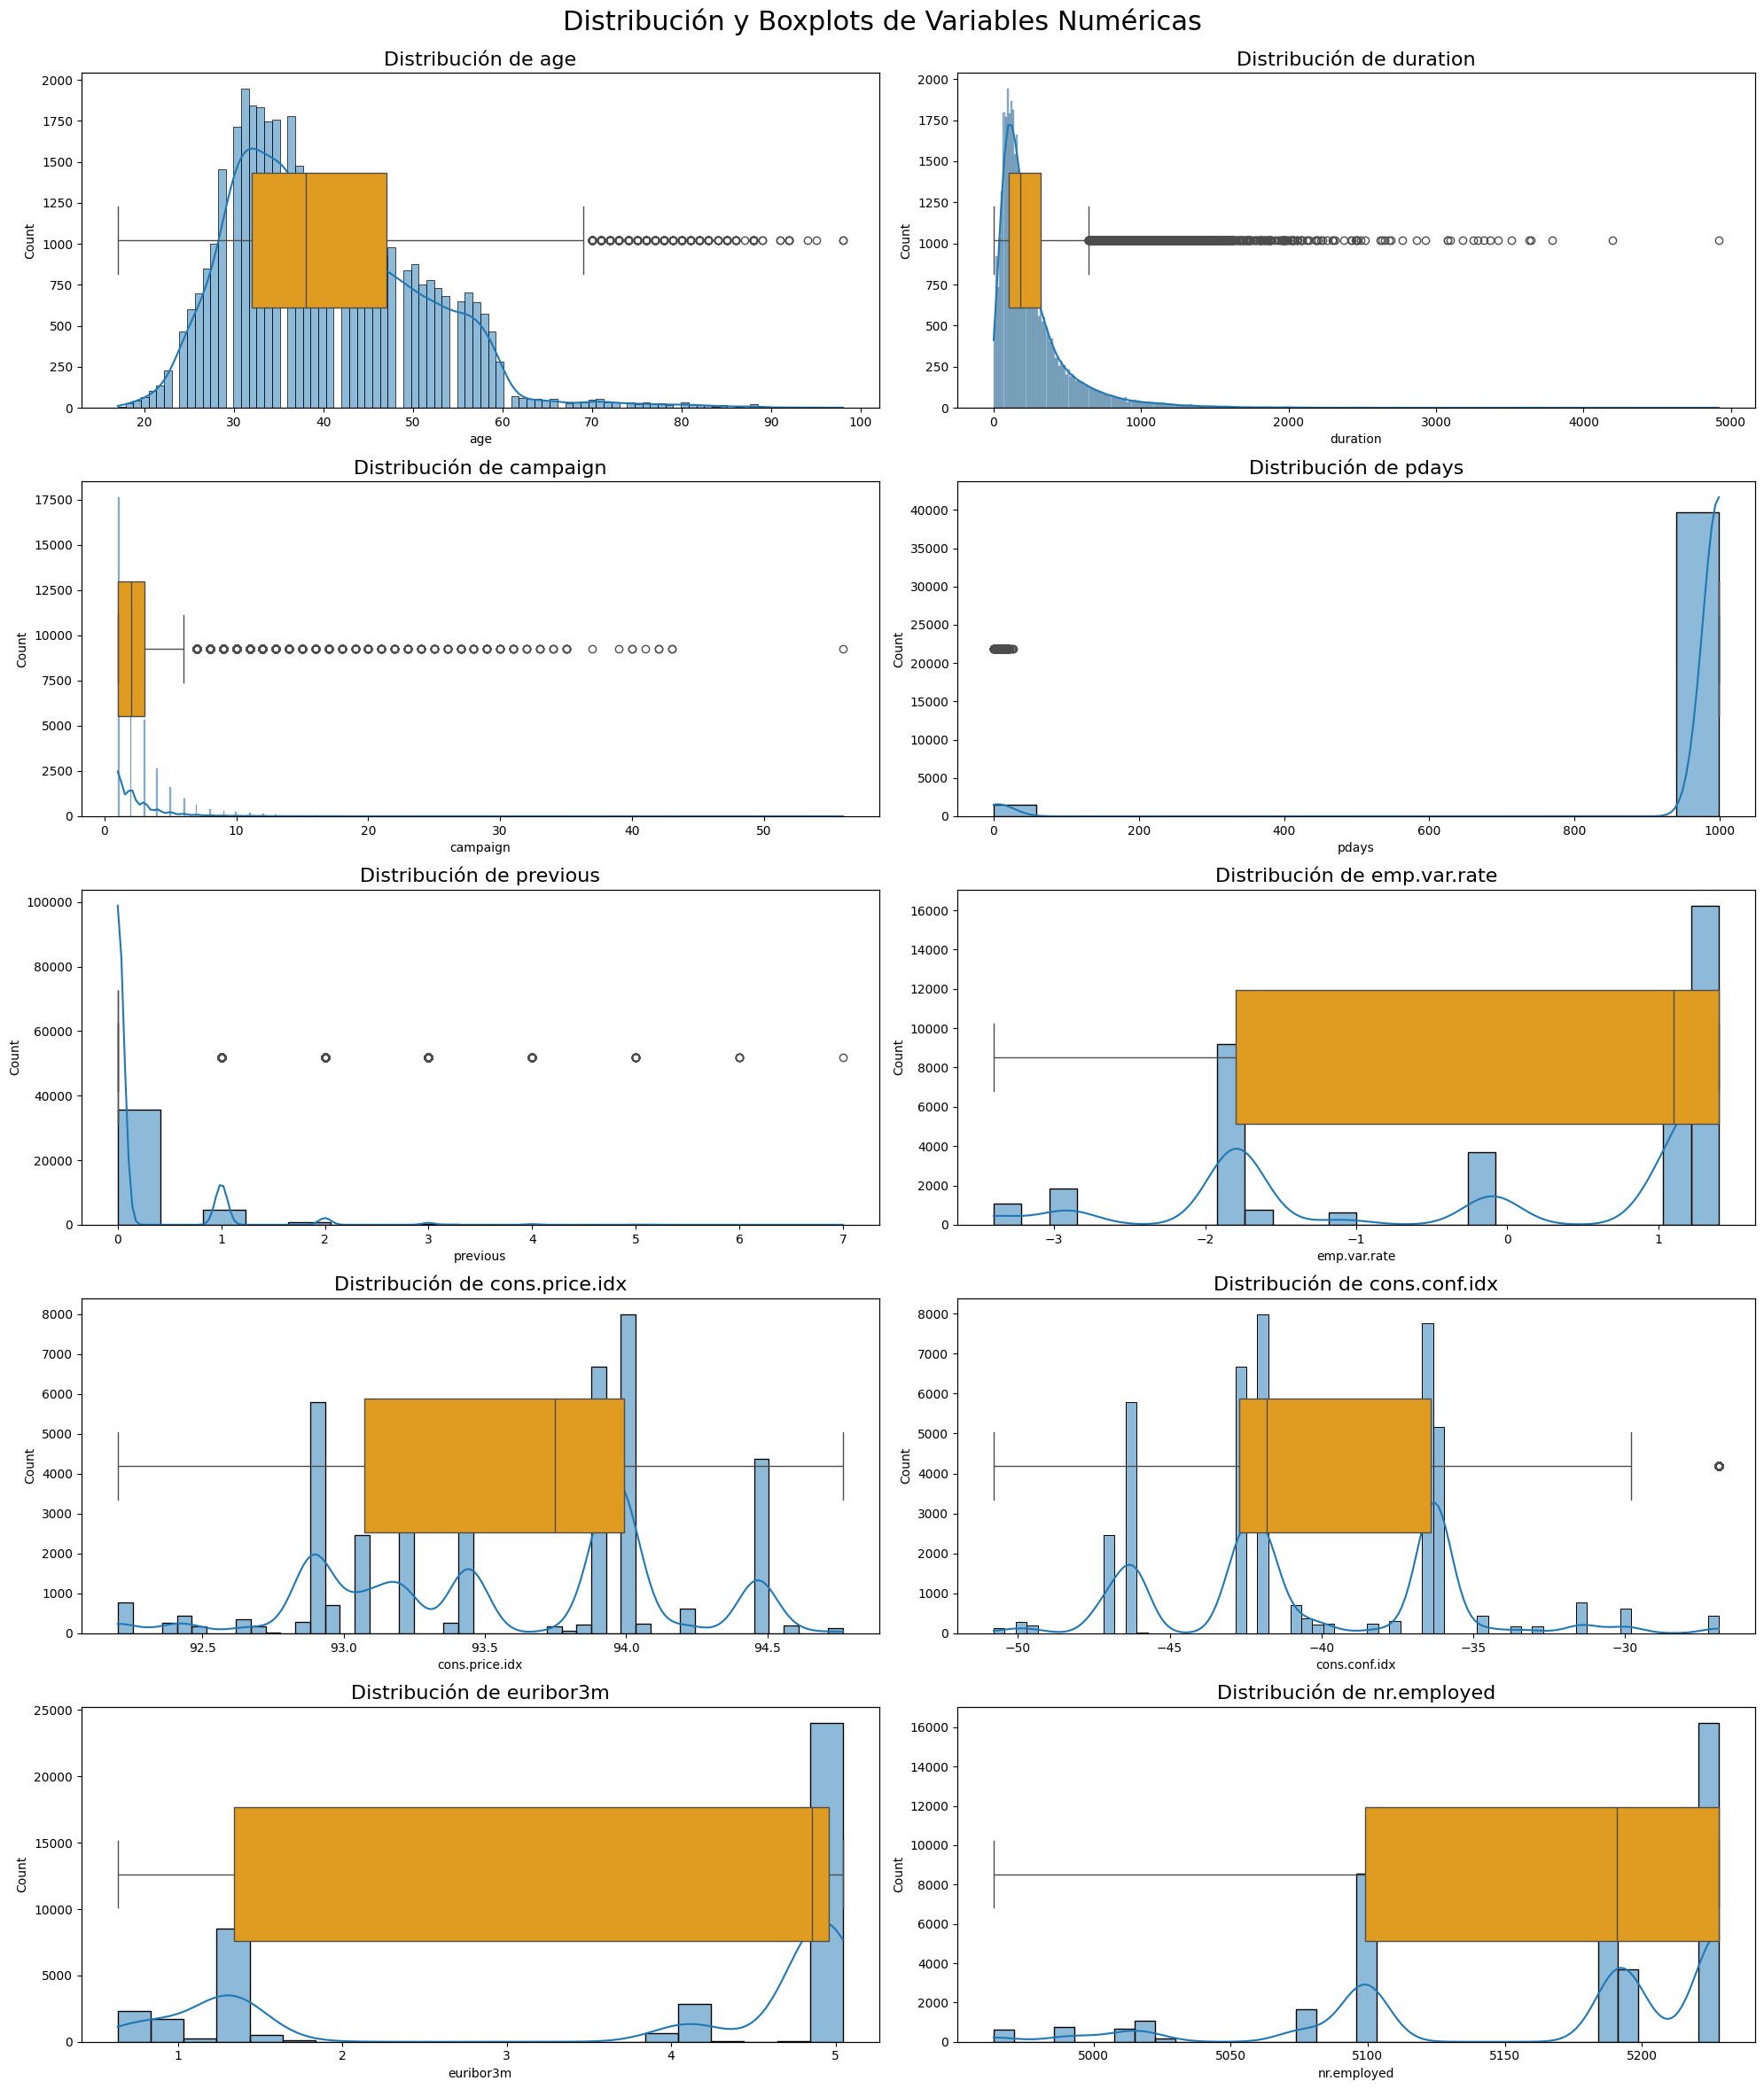

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Listar las columnas numéricas
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous',
                   'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                   'euribor3m', 'nr.employed']

# Definir el tamaño del subplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 24))  # Ajusta filas y columnas según la cantidad de variables
fig.suptitle('Distribución y Boxplots de Variables Numéricas', fontsize=22)

# Graficar cada variable numérica usando histplot y boxplot
for idx, col in enumerate(numeric_columns):
    row = idx // 2  # Determinar la fila
    col_idx = idx % 2  # Determinar la columna
    
    # Histograma
    sns.histplot(data=df, x=col, ax=axes[row, col_idx], kde=True)  # Graficar histograma con estimación de densidad
    axes[row, col_idx].set_title(f'Distribución de {col}', fontsize=16)
    
    # Crear un subplot debajo para el boxplot
    boxplot_ax = axes[row, col_idx].twinx()  # Crear un segundo eje para el boxplot
    sns.boxplot(data=df, x=col, ax=boxplot_ax, color='orange', width=0.4)
    boxplot_ax.set(yticks=[])

# Ajustar el layout para evitar solapamiento
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Espacio para el título general
plt.show()

Limpiamos la variable 'duration' de outliers.

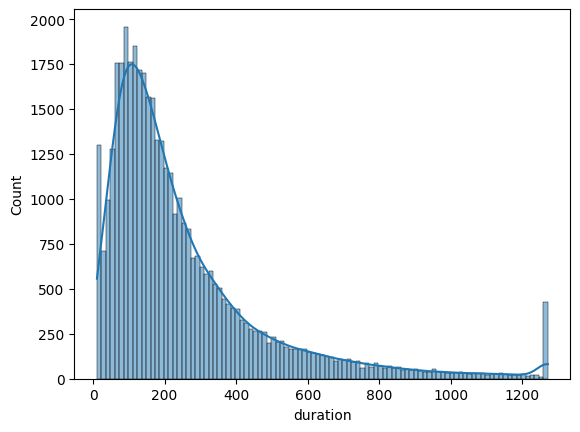

In [70]:
# Aplicar winsorización percentil
df['duration'] = df['duration'].clip(lower=df['duration'].quantile(0.01),
                                     upper=df['duration'].quantile(0.99))

# Verificar la distribución
sns.histplot(df['duration'], kde=True)
plt.show()


Análisis multivariante:


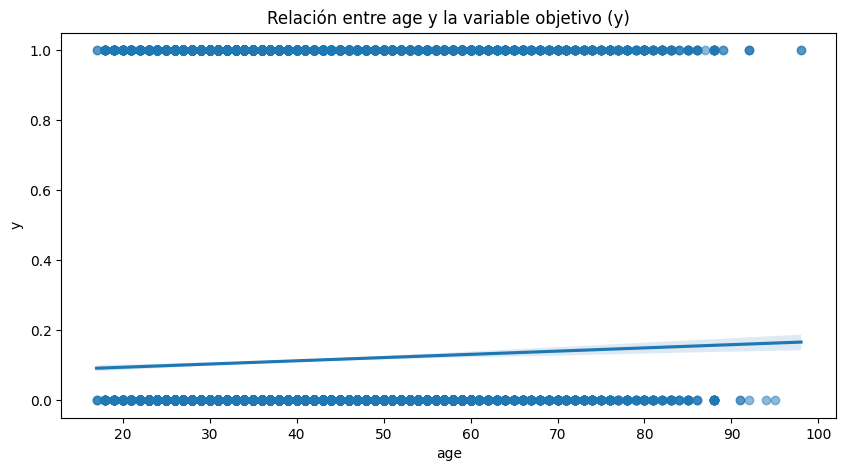

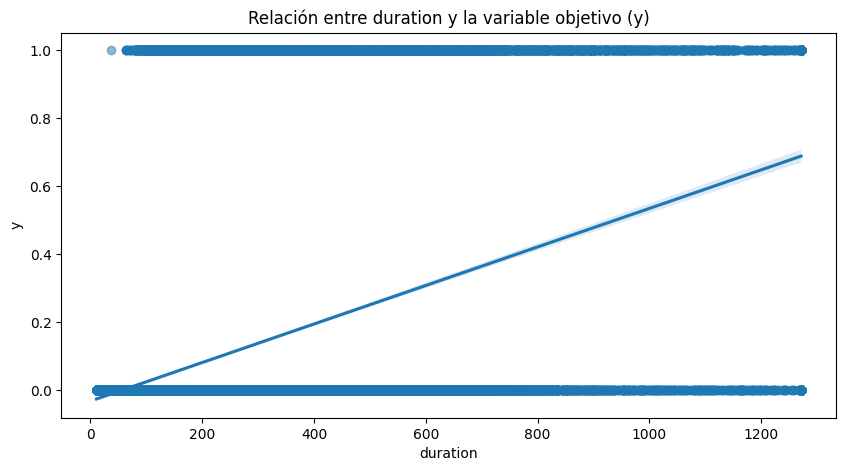

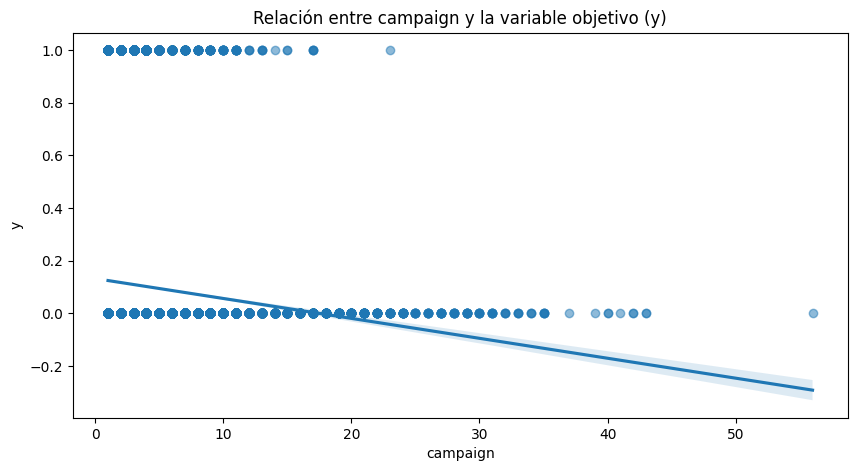

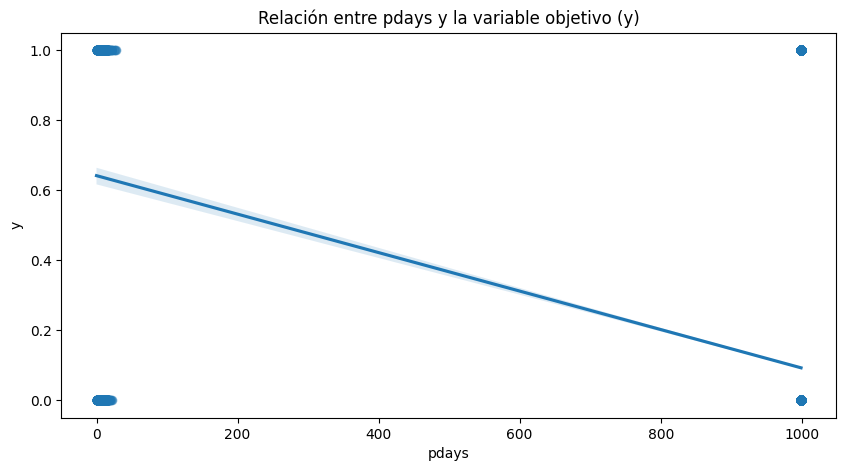

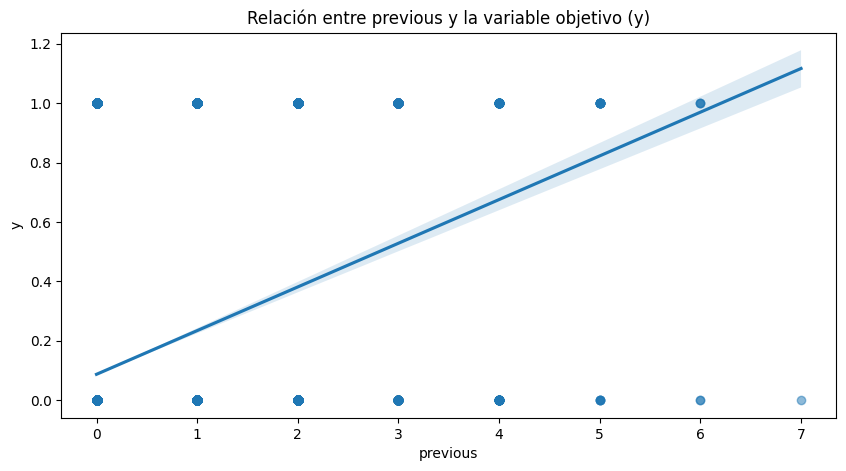

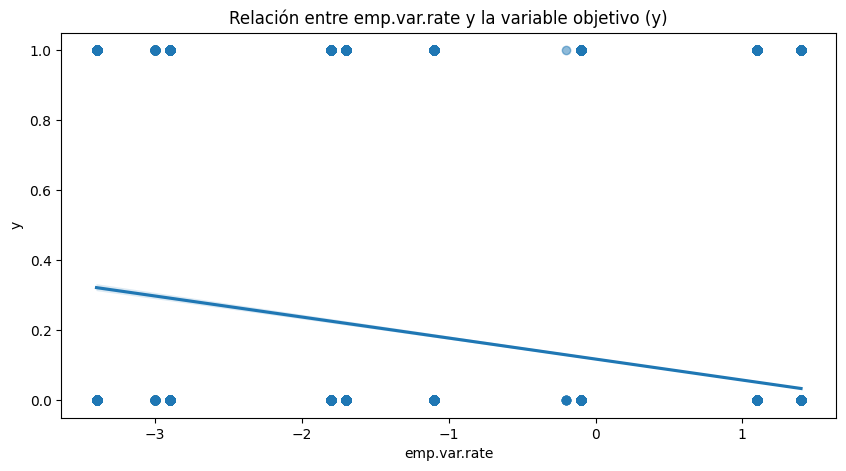

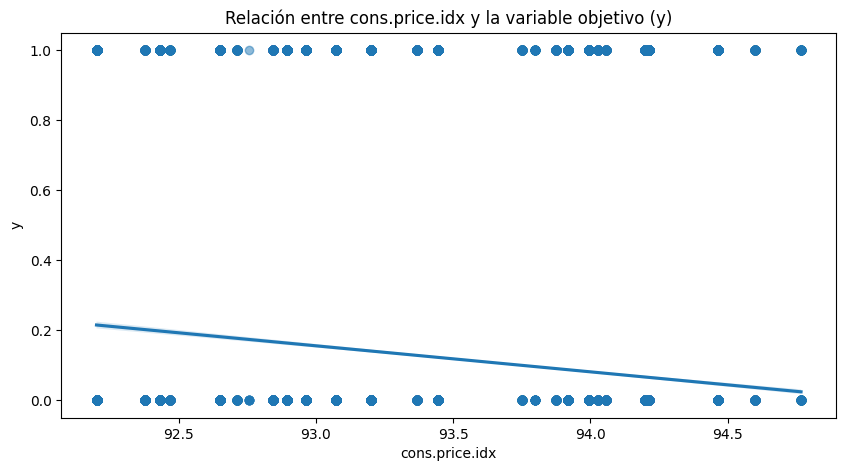

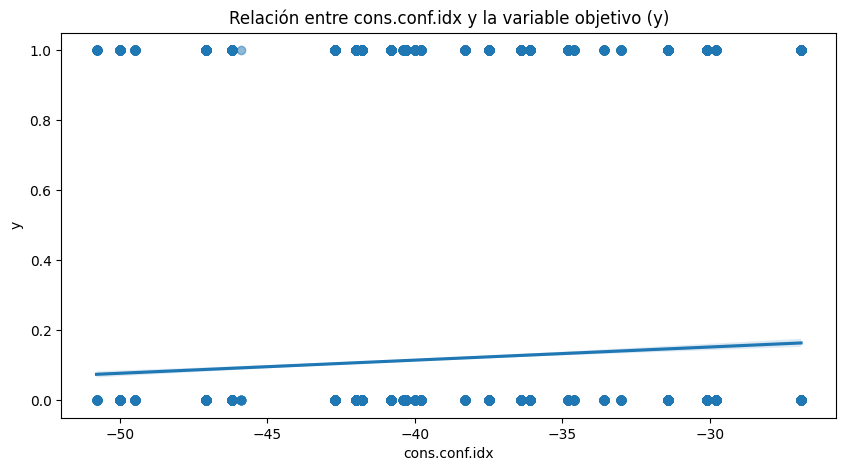

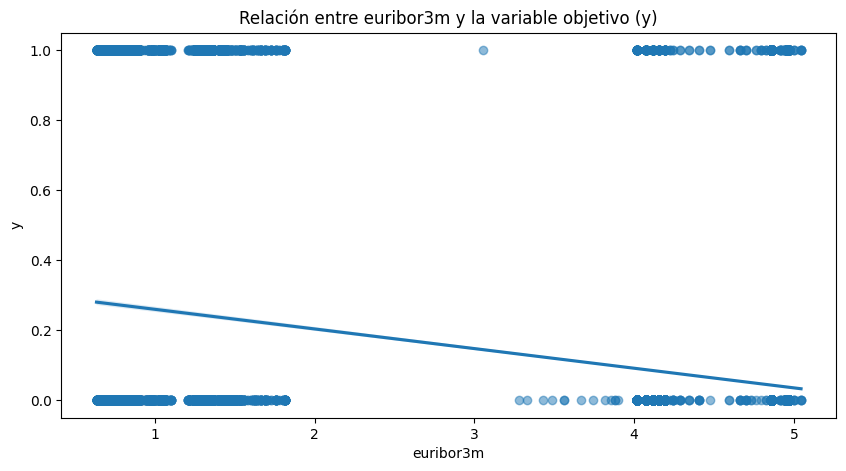

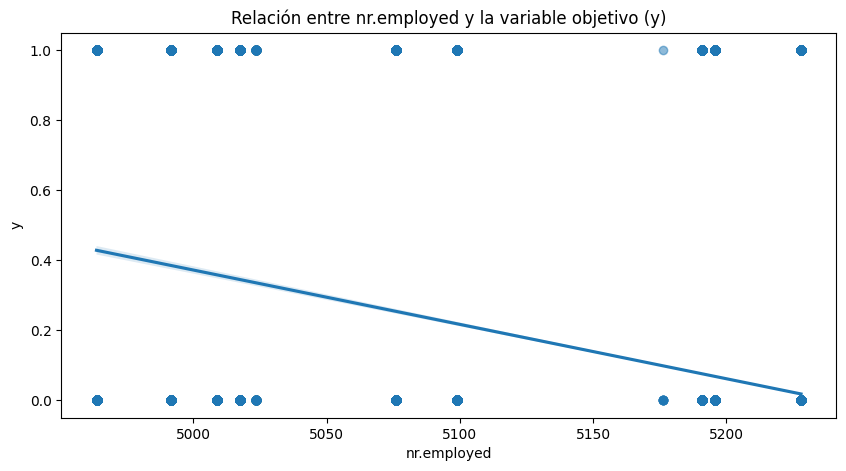

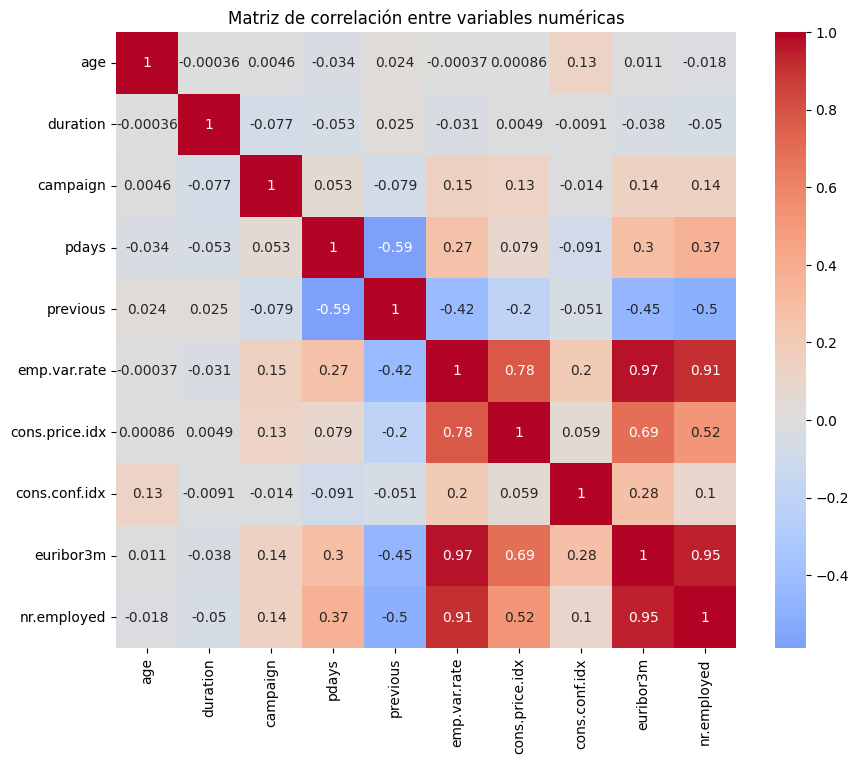

In [71]:
# Lista de las columnas numéricas de tu DataFrame
columnas_numericas = ['age', 'duration', 'campaign', 'pdays', 'previous',
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                      'euribor3m', 'nr.employed']

# Asegurarnos de que las columnas numéricas realmente sean numéricas
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Convertir la variable 'y' en numérica (0 y 1) si no lo ha sido ya
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Crear diagramas de dispersión con líneas de regresión para cada variable numérica en relación con la variable objetivo 'y'
for columna in columnas_numericas:
    plt.figure(figsize=(10, 5))
    sns.regplot(data=df, x=columna, y='y', scatter_kws={'alpha': 0.5})
    plt.title(f'Relación entre {columna} y la variable objetivo (y)')
    plt.xlabel(columna)
    plt.ylabel('y')
    plt.show()

# Calcular la matriz de correlación
correlation_matrix = df[columnas_numericas].corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

De los diagramas anteriores no entiendo nada que sentido tiene hacer eso... La corr matrix si

Categóricas vs "y"

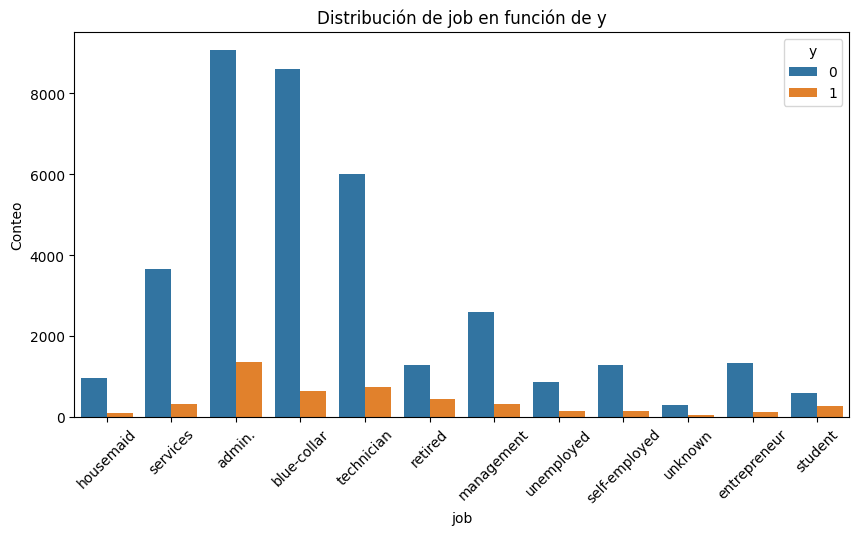

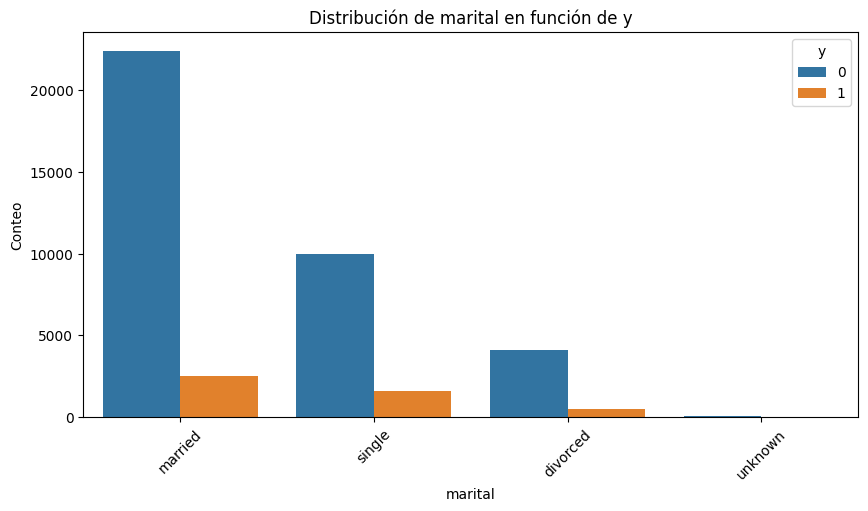

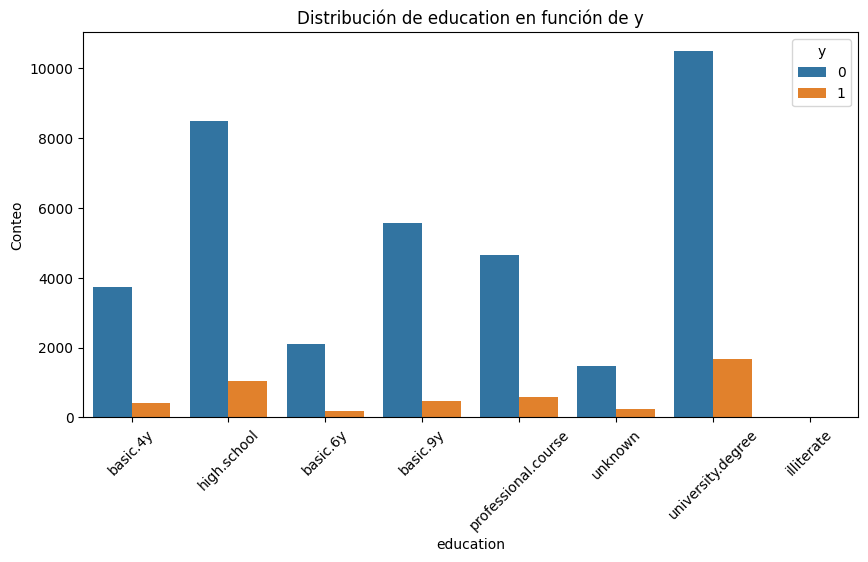

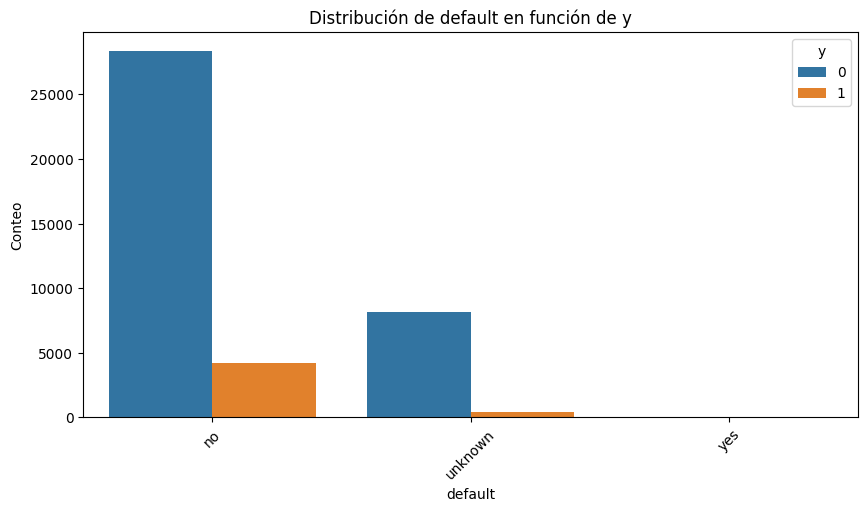

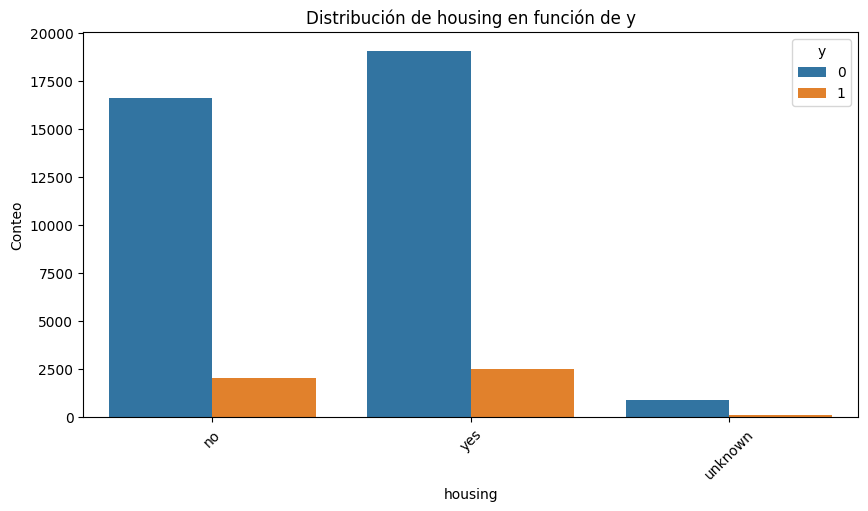

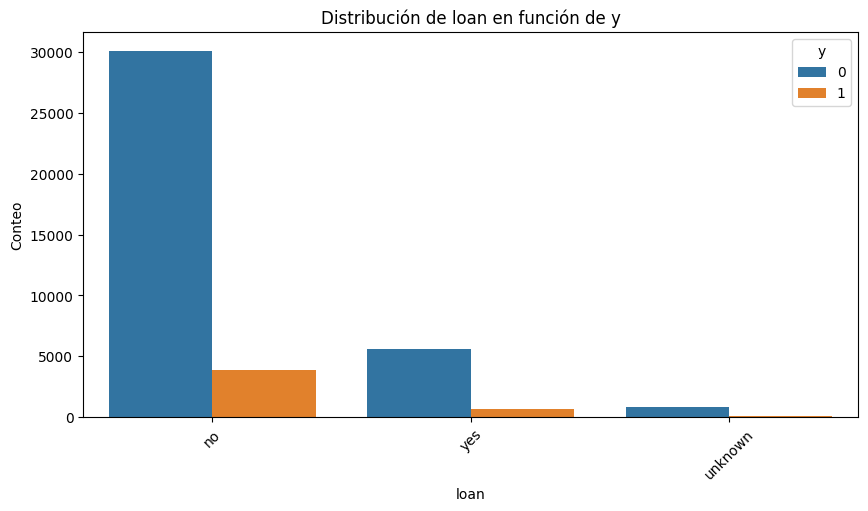

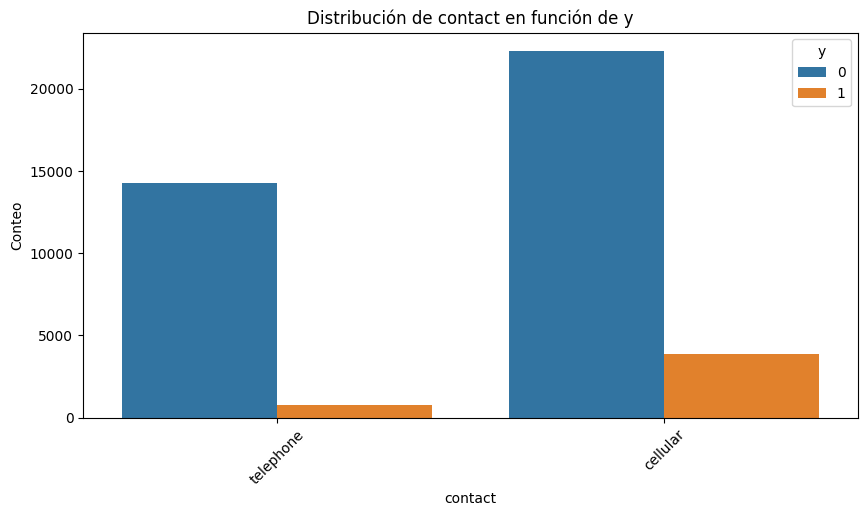

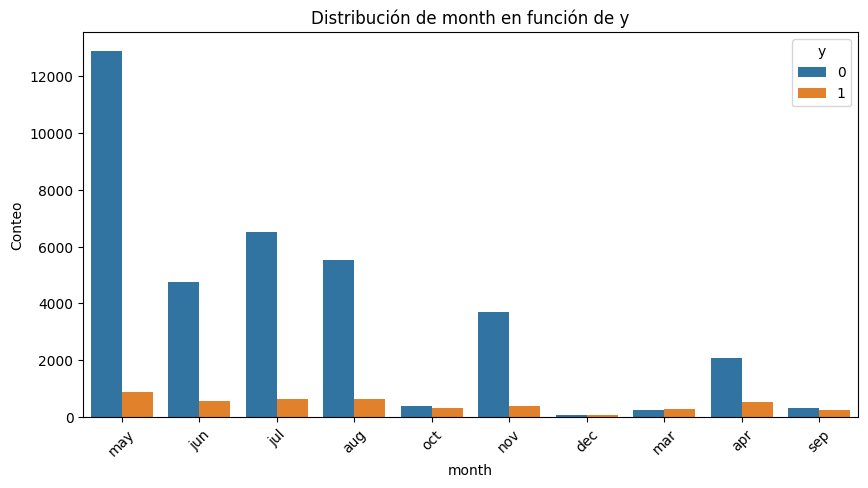

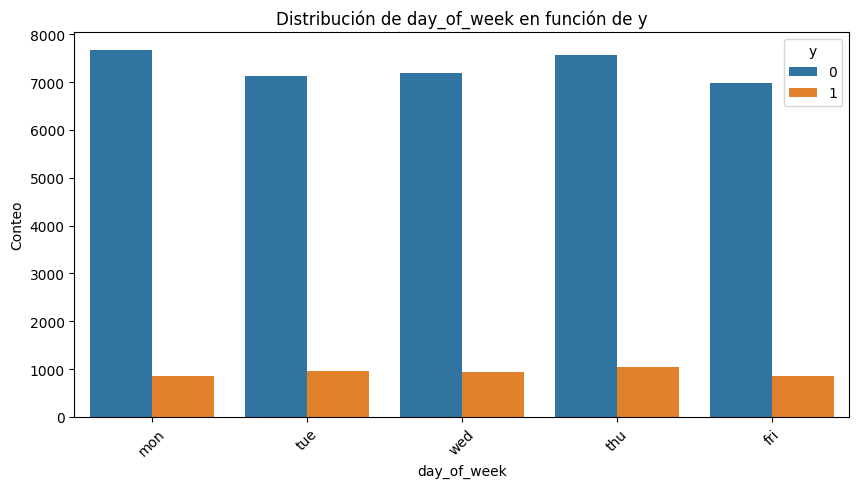

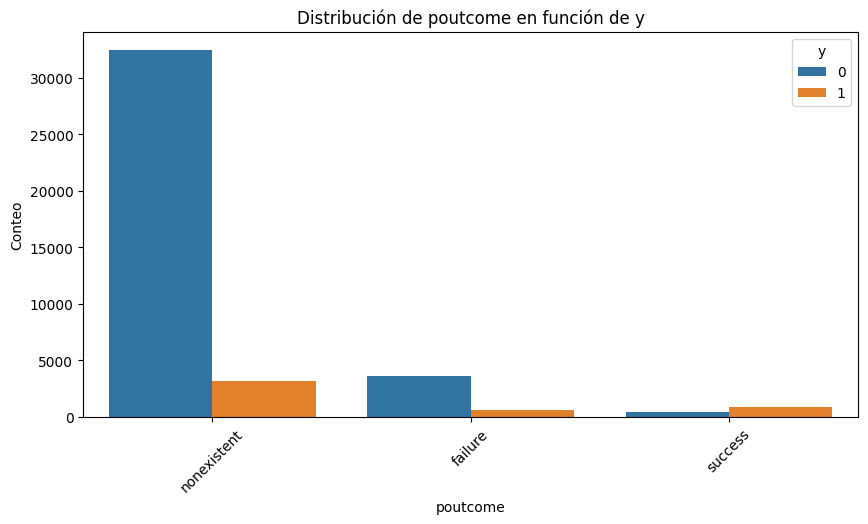

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de las columnas categóricas de tu DataFrame
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                       'contact', 'month', 'day_of_week', 'poutcome']

# Crear countplots para cada variable categórica en relación con la variable objetivo 'y'
for columna in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=columna, hue='y')  # hue='y' desglosa por la variable objetivo
    plt.title(f'Distribución de {columna} en función de y')
    plt.xlabel(columna)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)  # Rotar las etiquetas para mejor visualización
    plt.legend(title='y')
    plt.show()

Vamos a proceder a eliminar redundancias y seleccionar para el entrenamiento.

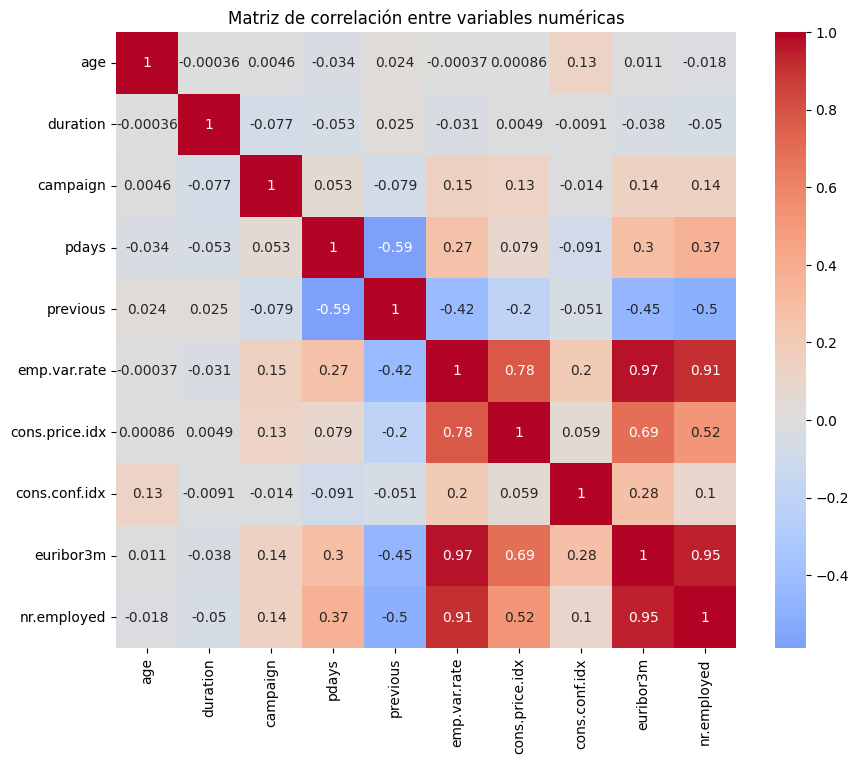

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df[['age', 'duration', 'campaign', 'pdays', 'previous',
                         'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                         'euribor3m', 'nr.employed']].corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

# Eliminar variables altamente correlacionadas
# Por ejemplo, si 'emp.var.rate' y 'euribor3m' están altamente correlacionadas:
df = df.drop(['emp.var.rate', 'euribor3m'], axis=1)  # Esto es solo un ejemplo, ajusta según tus datos

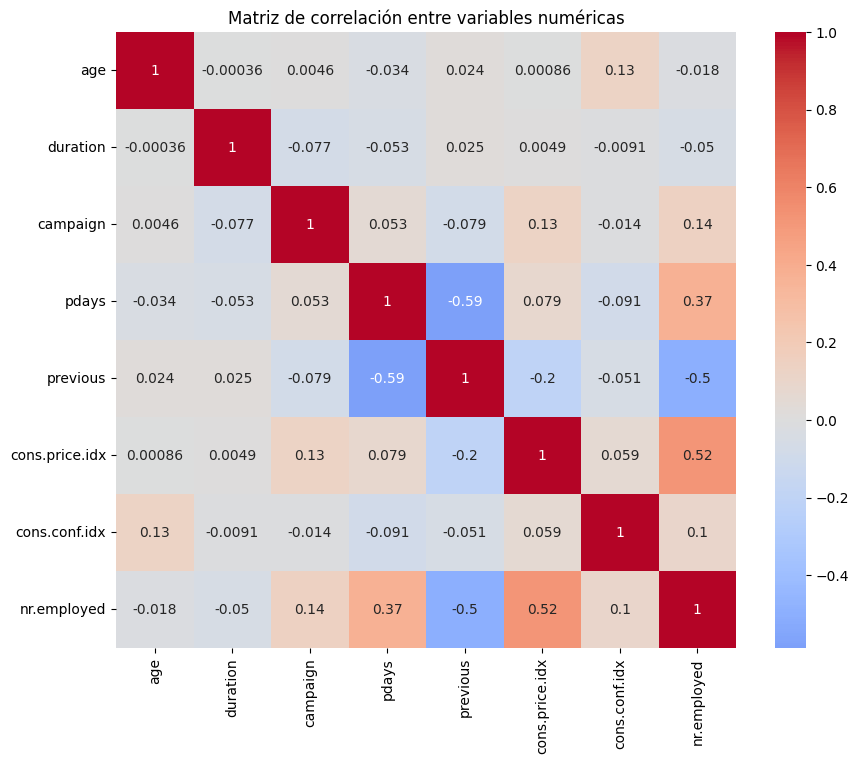

Pares de variables con alta correlación (mayor a 0.5 o menor a -0.5):
previous y pdays tienen una correlación de -0.59
nr.employed y previous tienen una correlación de -0.50
nr.employed y cons.price.idx tienen una correlación de 0.52
Variables eliminadas debido a alta correlación:
['pdays', 'previous', 'cons.price.idx']


In [74]:
# Calcular la matriz de correlación de las variables numéricas
correlation_matrix = df[['age', 'duration', 'campaign', 'pdays', 'previous',
                         'cons.price.idx', 'cons.conf.idx',
                          'nr.employed']].corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

# Identificar pares de variables altamente correlacionadas (correlación > 0.5 o < -0.5)
def get_highly_correlated_pairs(corr_matrix, threshold=0.5):
    correlated_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return correlated_pairs

# Obtener los pares de variables con alta correlación
highly_correlated_pairs = get_highly_correlated_pairs(correlation_matrix, threshold=0.5)
print("Pares de variables con alta correlación (mayor a 0.5 o menor a -0.5):")
for var1, var2, corr_value in highly_correlated_pairs:
    print(f"{var1} y {var2} tienen una correlación de {corr_value:.2f}")

# Eliminar una de cada par de variables altamente correlacionadas
variables_a_eliminar = [var2 for var1, var2, _ in highly_correlated_pairs]

# Filtrar el DataFrame eliminando las variables redundantes
df_reducido = df.drop(columns=variables_a_eliminar)

print("Variables eliminadas debido a alta correlación:")
print(variables_a_eliminar)

In [75]:
df = df.drop(['pdays'], axis=1)

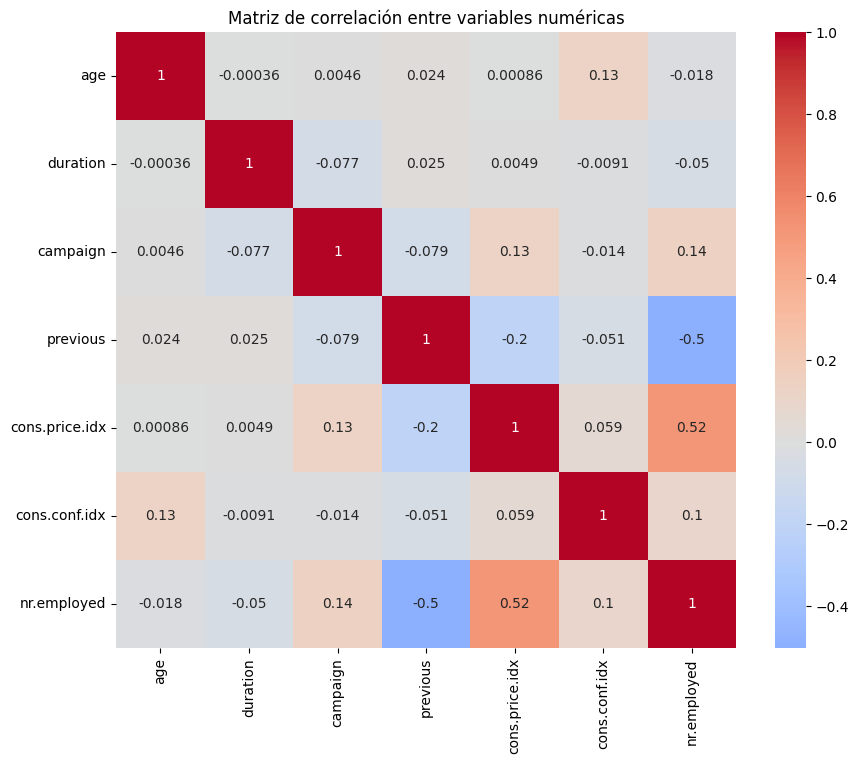

Pares de variables con alta correlación (mayor a 0.5 o menor a -0.5):
nr.employed y previous tienen una correlación de -0.50
nr.employed y cons.price.idx tienen una correlación de 0.52
Variables eliminadas debido a alta correlación:
['previous', 'cons.price.idx']


In [77]:
# Calcular la matriz de correlación de las variables numéricas
correlation_matrix = df[['age', 'duration', 'campaign', 'previous',
                         'cons.price.idx', 'cons.conf.idx',
                          'nr.employed']].corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

# Identificar pares de variables altamente correlacionadas (correlación > 0.5 o < -0.5)
def get_highly_correlated_pairs(corr_matrix, threshold=0.5):
    correlated_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return correlated_pairs

# Obtener los pares de variables con alta correlación
highly_correlated_pairs = get_highly_correlated_pairs(correlation_matrix, threshold=0.5)
print("Pares de variables con alta correlación (mayor a 0.5 o menor a -0.5):")
for var1, var2, corr_value in highly_correlated_pairs:
    print(f"{var1} y {var2} tienen una correlación de {corr_value:.2f}")

# Eliminar una de cada par de variables altamente correlacionadas
variables_a_eliminar = [var2 for var1, var2, _ in highly_correlated_pairs]

# Filtrar el DataFrame eliminando las variables redundantes
df_reducido = df.drop(columns=variables_a_eliminar)

print("Variables eliminadas debido a alta correlación:")
print(variables_a_eliminar)

In [78]:
# Lista de las columnas seleccionadas para el modelo
selected_columns = ['age', 'duration', 'campaign', 'previous',
                    'cons.price.idx', 'cons.conf.idx', 'nr.employed',
                    'job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Filtrar el DataFrame para quedarse solo con las columnas seleccionadas
df_model = df[selected_columns + ['y']]  # Incluye también la variable objetivo

In [79]:
# Aplicar One-Hot Encoding a las variables categóricas
df_model = pd.get_dummies(df_model, columns=['job', 'marital', 'education', 'default',
                                             'housing', 'loan', 'contact', 'month',
                                             'day_of_week', 'poutcome'], drop_first=True)

# Verificar la forma del nuevo DataFrame
print(df_model.shape)

(41188, 51)


In [80]:
df.info()

df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  nr.employed     41188 non-null  float64
 17  y               41188 non-null 

Paso 3: Selección de la Arquitectura
El modelo seleccionado es la regresión logística, que es adecuado para problemas de clasificación binaria como el que estás enfrentando (predecir si un cliente contratará un depósito a largo plazo).

La regresión logística es una buena elección inicial porque es un modelo interpretable y sencillo, lo que lo convierte en un buen punto de partida.

Paso 4: Entrenamiento del Modelo
Vamos a dividir los datos en conjuntos de entrenamiento y prueba, y luego entrenaremos el modelo de regresión logística.

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_model.drop(columns=['y'])  # Características
y = df_model['y']  # Variable objetivo

# Estandarizar las características numéricas para la regresión logística
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

Paso 5: Extracción de Métricas del Entrenamiento
Vamos a evaluar el rendimiento del modelo usando métricas comunes en clasificación: matriz de confusión, precisión, recall, F1-score y exactitud.

In [83]:
# Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nExactitud del Modelo:")
print(f"Exactitud: {accuracy_score(y_test, y_pred):.4f}")

Matriz de Confusión:
[[7091  212]
 [ 514  421]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.45      0.54       935

    accuracy                           0.91      8238
   macro avg       0.80      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238


Exactitud del Modelo:
Exactitud: 0.9119


Paso 6: Optimización del Modelo

In [84]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a optimizar
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores Hiperparámetros:", grid_search.best_params_)

# Entrenar el modelo con los mejores parámetros encontrados
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluar el rendimiento en el conjunto de prueba
y_pred_optimized = best_model.predict(X_test)
print("\nExactitud del Modelo Optimizado:")
print(f"Exactitud: {accuracy_score(y_test, y_pred_optimized):.4f}")

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:34

Mejores Hiperparámetros: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}

Exactitud del Modelo Optimizado:
Exactitud: 0.9120
